# Rekognisi Citra Menggunakan Deep Learning

Materi yang diajarkan pada *notebook* ini adalah:
1. *Fully-connected Layer*
2. *Convolutional Layer*
3. *Convolutional Neural Networks*
4. *Pooling Layer*
5. Implementasi *Deep Learning* pada rekognisi citra
6. Implementasi rekognisis citra dengan keras

## *Fully-connected Layer*
+ Terdiri dari neuron-neuron yang terhubung ke seluruh input, seperti dalam neural networks biasa
+ Implementasi dengan menggunakan CIFAR-10
    + Citra 32x32x3 diubah menjadi vektor 1 dimensi dengan ukuran 3072
    + Output yang diharapkan berukuran 10 -> 10 kelas dari CIFAR-10
    + Jumlah parameter yang diperlukan 10 x 3072
+ Jumlah *dot procut* adalah satu

![fcl](Asset/fcl-1.png)
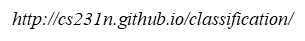

## Convolutional Layer

+ Mengubah bentuk dimensi dari citra tanpa menghilangkan kedalaman dari input
+ Menggunakan operasi *dot product* antara citra input dengan kernel yang digeser secara berkala
+ Yang penting dalam konvolusi: Ukuran kernel, besaran perpindahan atau *stride*, *spatial extent*, dan *zero padding*
+ Layer ini menerima:
    + input berukuran $W_1\times H_1 \times D_1$ (**ket: W = Lebar, H = Tinggi, D = kedalaman**)
    + Parameter: Number of filters K, spatial extent F, stride S, zero padding P
    + Menghasilkan $W_2\times H_2 \times D_2$ dimana: 
        + $W_2 = (W_1 - F + 2P)/S+1$
        + $H_2 = (H_1 - F + 2P)/S+1$
        + $D_2 = K$
![convolution](Asset/convl-1.png)
+ Hasil dari konvolusi berupa *map* aktivasi. Konvolusi dilakukan diseluruh bagian citra
+ Laman interaktif untuk Konvolusi [link](http://cs231n.github.io/convolutional-networks/)
![convolution](Asset/convl-2.png)
![convolution](Asset/convl-3.png)
+ Jika ada 6 filter, maka akan menghasilkan 6 *map* aktivasi yang berbeda
+ Kita bisa menggabungkan hasil konvosuli sebagai citra baru dengan ukuran $28\times28\times6$
![convolution](Asset/convl-4.png)
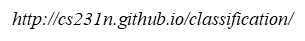

##  Convolutional Neural Network

+ Akrab disebut dengan CNN adalah rangkaian Convolutional Layer yang diselingi dengan fungsi aktivasi

![cnn](Asset/cnn-1.png)
![cnn](Asset/cnn-2.png)

## Pooling Layer

+ Membat representasi lebih kecil dan lebih mudah diatur
+ Beroperasi di atas setiap map aktivasi secara independen
![pool](Asset/pool-1.png)

### Max Pooling

+ Filter yang mengambil nilai terbesar dari suatu *patch* (sub-bagian)
![maxpool](Asset/maxpool-1.png)

## Implementasi dengan keras

In [1]:
import numpy as np

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical

np.random.seed(1000)

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.0001, decay=1e-6),
             metrics=['accuracy'])

model.fit(X_train/255.0, to_categorical(Y_train),
         batch_size=128,
         shuffle=True,
         epochs=250,
         validation_data=(X_test/255.0, to_categorical(Y_test)),
         callbacks=[EarlyStopping(min_delta=0.001, patience=3)])

scores = model.evaluate(X_test/255.0, to_categorical(Y_test))
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

print('Loss {}'.format(scores[0]))
print('Accuracy {}'.format(scores[1]))

Train on 50000 samples, validate on 10000 samples
Epoch 1/250
50000/50000 [==============================] - 77s 2ms/step - loss: 1.9400 - acc: 0.2778 - val_loss: 1.7025 - val_acc: 0.3858
Epoch 2/250
50000/50000 [==============================] - 39s 787us/step - loss: 1.6173 - acc: 0.4057 - val_loss: 1.5094 - val_acc: 0.4470
Epoch 3/250
50000/50000 [==============================] - 39s 789us/step - loss: 1.4899 - acc: 0.4547 - val_loss: 1.4030 - val_acc: 0.5017
Epoch 4/250
50000/50000 [==============================] - 39s 788us/step - loss: 1.4101 - acc: 0.4884 - val_loss: 1.3315 - val_acc: 0.5148
Epoch 5/250
50000/50000 [==============================] - 41s 814us/step - loss: 1.3464 - acc: 0.5139 - val_loss: 1.2613 - val_acc: 0.5481
Epoch 6/250
50000/50000 [==============================] - 41s 812us/step - loss: 1.2952 - acc: 0.5362 - val_loss: 1.2075 - val_acc: 0.5711
Epoch 7/250
50000/50000 [==============================] - 40s 805us/step - loss: 1.2530 - acc: 0.5525 - val_los

Epoch 59/250
50000/50000 [==============================] - 44s 873us/step - loss: 0.5213 - acc: 0.8177 - val_loss: 0.6303 - val_acc: 0.7852
Epoch 60/250
50000/50000 [==============================] - 44s 874us/step - loss: 0.5153 - acc: 0.8198 - val_loss: 0.6310 - val_acc: 0.7836
Epoch 61/250
50000/50000 [==============================] - 43s 854us/step - loss: 0.5099 - acc: 0.8211 - val_loss: 0.6246 - val_acc: 0.7852
Epoch 62/250
50000/50000 [==============================] - 43s 853us/step - loss: 0.5061 - acc: 0.8240 - val_loss: 0.6146 - val_acc: 0.7884
Epoch 63/250
50000/50000 [==============================] - 45s 894us/step - loss: 0.5022 - acc: 0.8240 - val_loss: 0.6194 - val_acc: 0.7886
Epoch 64/250
50000/50000 [==============================] - 42s 847us/step - loss: 0.4965 - acc: 0.8249 - val_loss: 0.6096 - val_acc: 0.7896
Epoch 65/250
50000/50000 [==============================] - 44s 890us/step - loss: 0.4878 - acc: 0.8286 - val_loss: 0.6155 - val_acc: 0.7923
Epoch 66/250


AttributeError: 'numpy.float64' object has no attribute '3f'